# RNN을 배워봅시다!
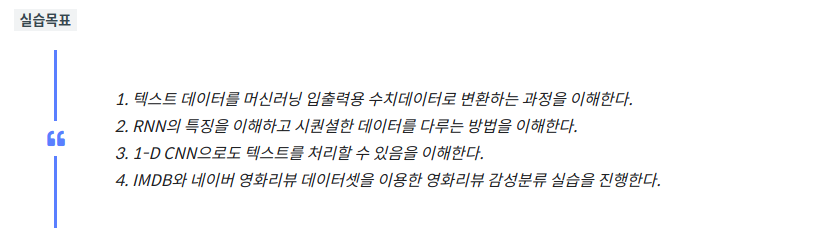

이미지 처리에 사용되는 cnn을 rnn에 사용 가능합니다. 영화리뷰 감성분석을 진행해 보도록 하겠습니다. 


## 4-2 텍스트 감정분석의 유용성 
IMDB와 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이 긍정인지 부정인지 분류하는 딥러닝 모델 만들기를 하겠습니다.     

+ 텍스트 데이터만 가지고 있는 정보적 특성과 가치는 무엇이 있을까?    
>sns등에서 데이터를 광범위하게 얻을 수 있는데. 소비자의 개인적, 감성적 반응이 직접 담겨 있어서 실시간 트랜드를 빠르게 반영할 수 있음.

+ 감성분석 등 텍스트 분류 모델이 다른 데이터분석 업무에 어떤 점에서 도움을 주나요?  
>비정형 데이터인 텍스트에 감성분석 기법을 적용하면 텍스트를 정형데이터로 가공할 수 있음
+ 텍스트 데이터 분석의 기술적 어려움은 무엇인가?  
>사전기반학습은 감성점수가 달라질 수 있다는 가능성을 대응하기 어려움. 머신러닝 기반: 단순 긍부정을 넘어서 긍부정의 원인이 되는 대상 속성 기반의 감성분석 불가
+ 텍스트 분류 작업을 하는데 딥러닝이 적용된다면 어떤 점에서 유리해질까요? 


## 4-3.텍스트 데이터의 특징 
+ 텍스트를 어떻게 숫자행렬로 표현할까? 
>+ 텍스트는 단순히 숫자로 부여한다면 텍스트의 특징은 그 자체로 기호이지 텍스트가 내표하는 의미를 기호가 직접 내포하지 않는다는 점입니다.        
>+ 사전을 만들어서 사용하하겠습니다. 단어와 그 단어의 의미를 나타내는 벡터를 짝지어 보겠습니다.      

+ 텍스트에 순서가 중요한데 입력데이터의 순서를 인공지능 모델에 어떻게 반영을 할까? 
>+


In [1]:
#처리해야 하는 문장을 파이썬리스트로 옮겨보겠습니다. 
sentences = ['i feel hungry','i eat lunch','now i feel happy']

#split을 사용하여 단위를 쪼개 보겠습니다. 
word_list = sentences[0].split()
print(word_list)

['i', 'feel', 'hungry']


In [2]:
#모든 문장을 단어 단위로 쪼갠 후 딕셔너리로 표현하겠습니다.   
index_to_word = {}

index_to_word[0] = '<PAD>' #패딩용 단어 
index_to_word[1] = '<BOS>' #문장의 시작점
index_to_word[2] = '<UNK>' #사전에 없는 단어
index_to_word[3] = 'i'
index_to_word[4] = 'feel'
index_to_word[5] = 'hungry'
index_to_word[6] = 'eat'
index_to_word[7] = 'lunch'
index_to_word[8] = 'now'
index_to_word[9] = 'happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [3]:
#덱스트를 숫자형으로 바꾸려면 딕셔너리가 현재는 {숫자:단어} >{단어:숫자}로 변경해야 합니다. 
word_to_index = {word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])

4


In [5]:
#문장 1개를 활용할 딕셔너리를 주면, 단어 인덱스 리스트로 변환해주는 함수를 만들어 봅니다. 

def get_encoded_sentence(sentence, word_to_index):
    return[word_to_index['<BOS>']]+[word_to_index[word]if word in word_to_index else word_to_index['<UNK>']for word in sentence.split()]

print(get_encoded_sentence('i eat lunch',word_to_index))

[1, 3, 6, 7]


In [6]:
#여러개의 문장 리스트를 한꺼번에 숫자로 변환하겠습니다.
def get_encoded_sentences(sentences, word_to_index):
    return[get_encoded_sentence(sentence,word_to_index)for sentence in sentences]
encoded_sentences = get_encoded_sentences(sentences,word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [7]:
#숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentences, index_to_word):
    return' '.join(index_to_word[index]if index in index_to_word else '<UNK>' for index in encoded_sentences[1:]) #<'BOS'>를 뺀다. 

print(get_decoded_sentence([1,3,4,5], index_to_word))

i feel hungry


In [8]:
#여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return[get_decoded_sentence(encoded_sentence,index_to_word)for encoed_sentence in encoded_sentences]

print(get_decoded_sentences(encoded_sentences, index_to_word))

NameError: name 'encoded_sentence' is not defined